In [1]:
import os
import pandas as pd
import re
import ngrams
import fasttext
import numpy as np
import math

In [2]:
#将属性名按照标点，分割成token
def snake_case_split(line):
    #Python strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。
    #r表示非转义的原始字符串
    #由于正则表达式通常都包含反斜杠，所以你最好使用原始字符串来表示它们。模式元素(如 r'\t'，等价于 '\\t')匹配相应的特殊字符。
    #[...]用来表示一组字符,单独列出：[amk] 匹配 'a'，'m'或'k'
    line_split = re.split(r'[\s_]',line.strip())
    line_split = [line.strip() for line in line_split if len(line.strip())>0]
    return line_split


#将属性按照大写字母，分割成token
#"firstName"分成 ['First', 'Name']
def camel_case_split(str):
    if "a"<=str[0]<="z" :
        strTemp=str[0].upper()+str[1:]
        return re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', strTemp)
    else :
        return re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', str)


#将属性名先按照snakeCase拆分，再按照camelCase拆分
#最后按照语料库拆分
def attributeToToken(str):
    tokenList = []
    for snakeToken in snake_case_split(str):
        for camelToken in camel_case_split(snakeToken):
            camelToken = camelToken.lower()
            corpusTokenList = ngrams.segment2(camelToken) [1]
            tokenList = tokenList + corpusTokenList
    #属性名为纯数字，tokenList会是空的，需要完善一下
    if len(tokenList)==0:
        tokenList = ["number"]
    return tokenList

In [3]:
class Attribute:
    def __init__(self, attributeName, originateFrom):
        self.attributeName = attributeName
        self.tokenList = attributeToToken(attributeName)
        #属性来自哪张表
        self.originateFrom = originateFrom

In [4]:
class Table:
    def __init__(self, tableName, attributeSet, tableID):
        self.tableName = tableName
        self.attributeSet = attributeSet
        self.tableID = tableID

In [ ]:
attributeList = []
#湖中所有的表在这个字典中
tableDict = {}
tableList = []
#getTokenWeight函数用到numOfAttribute
numOfAttribute = 0
#用于生成edge list
tableID = 0
for info in os.listdir('/usr/project/TC/example'):
    tableName = info[0:-4]#去掉.csv后缀
    domain = os.path.abspath('/usr/project/TC/example')#获取文件夹的路径
    info = os.path.join(domain,info)#将路径与文件名结合起来就是每个文件的完整路径
    df = pd.read_csv(info)
    attributeSet = {}
    for attributeName in list(df):
        x=Attribute(attributeName, tableName)
        attributeList.append(x)
        numOfAttribute = numOfAttribute+1
        attributeSet[attributeName] = x
    y = Table(tableName, attributeSet, tableID)
    tableDict[tableName] = y
    #tableList通过检验
    tableList.append(tableName)
    tableID = tableID+1

In [5]:
#tsv
attributeList = []
#湖中所有的表在这个字典中
tableDict = {}
tableList = []
#getTokenWeight函数用到numOfAttribute
numOfAttribute = 0
#用于生成edge list
tableID = 0
for info in os.listdir('/usr/project/TC/SmallD4EducationFinanceDatasets'):
    tableName = info[0:-4]#去掉.csv后缀
    domain = os.path.abspath('/usr/project/TC/SmallD4EducationFinanceDatasets')#获取文件夹的路径
    info = os.path.join(domain,info)#将路径与文件名结合起来就是每个文件的完整路径
    #tsv
    df = pd.read_csv(info, delimiter='\t')
    attributeSet = {}
    for attributeName in list(df):
        x=Attribute(attributeName, tableName)
        attributeList.append(x)
        numOfAttribute = numOfAttribute+1
        attributeSet[attributeName] = x
    y = Table(tableName, attributeSet, tableID)
    tableDict[tableName] = y
    #tableList通过检验
    tableList.append(tableName)
    tableID = tableID+1

/tmp/ipykernel_7151/1422135577.py:15: DtypeWarning: Columns (4,9,60,61,62,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(info, delimiter='\t')


In [6]:
print(numOfAttribute)

1829


In [7]:
#token的字典，用来记录token出现的次数nt
tokenDict = {}
for x in attributeList:
    for token in x.tokenList:
        if token in tokenDict:
            tokenDict[token] = tokenDict[token] + 1
        else:
            tokenDict[token] = 1
print(tokenDict)

{'business': 8, 'name': 74, 'street': 10, 'address': 239, 'location': 71, 'website': 3, 'category': 23, 'phone': 7, 'hours': 4, 'sat': 1, 'mon': 1, 'fri': 1, 'sun': 1, 'comparable': 470, 'rental': 362, 'neighborhood': 35, 'gross': 106, 'sqft': 113, 'building': 46, 'classification': 35, 'manhattan': 41, 'cooperatives': 93, 'properties': 108, 'income': 78, 'per': 78, 'market': 72, 'value': 79, 'full': 35, 'boro': 44, 'block': 43, 'lot': 47, 'dist': 26, 'from': 27, 'coop': 21, 'in': 29, 'miles': 24, 'est': 27, 'total': 80, 'units': 37, 'year': 64, 'built': 35, 'level': 112, 'number': 47, 'tested': 10, 'mean': 10, 'scale': 11, 'score': 16, 'grade': 51, 'fy': 144, 'actual': 57, 'agency': 20, 'plan': 30, 'site': 10, 'program': 23, 'type': 32, 'borough': 24, 'community': 12, 'age': 8, 'group': 8, 'contact': 9, 'bid': 10, 'city': 16, 'zip': 12, 'floor': 11, 'num': 37, 'tel': 1, 'staten': 60, 'island': 60, 'student': 4, 'progress': 14, 'college': 4, 'enroll': 7, 'graduation': 2, 'ready': 2, 'rp

In [8]:
ft = fasttext.load_model('cc.en.300.bin')

In [9]:
def getTokenWeight(token):
    nt = tokenDict[token]
    return math.log(numOfAttribute/nt)


#归一化向量
def normalize(x):
    return x/np.linalg.norm(x)

#加权平均，并归一化
#通过检验
def tokensToVector(tokenList):
    wordEmbedding = ft.get_word_vector(tokenList[0])
    x = wordEmbedding*getTokenWeight(tokenList[0])
    totalWeight = getTokenWeight(tokenList[0])
    for token in tokenList[1:]:
        wordEmbedding = ft.get_word_vector(token)
        x = x+wordEmbedding*getTokenWeight(token)
        totalWeight = totalWeight + getTokenWeight(token)
    return normalize(x/totalWeight)

In [10]:
attributeEmbeddingList = []
#计算attributeVector
for x in attributeList:
    x.attributeEmbedding = tokensToVector(x.tokenList)
    #points
    attributeEmbeddingList.append(x.attributeEmbedding)

#将向量列表按行写入文件，每个向量占一行
np.savetxt('attributeEmbeddingList.txt', attributeEmbeddingList)

In [11]:
print(len(attributeEmbeddingList))
print(len(attributeList))

1829
1829


In [12]:
import numpy as np

loaded_attributeEmbeddingList = np.loadtxt('attributeEmbeddingList.txt')
print(len(loaded_attributeEmbeddingList))

i = 0
for x in loaded_attributeEmbeddingList:
    attributeList[i].attributeEmbedding = x
    i = i+1

from pyclustering.cluster.gmeans import gmeans

gmeans_instance = gmeans(loaded_attributeEmbeddingList).process()
clusters = gmeans_instance.get_clusters()
print(len(clusters))
print(clusters)

1829
410
[[889], [935, 945, 949, 952, 953], [375, 387, 901, 908, 912, 1348], [1228], [1495, 1701, 1758, 1786], [1145], [1158], [1764], [1148, 1154, 1160, 1162, 1163], [1135, 1137, 1142, 1143, 1156], [1157], [1136], [1141], [1133, 1138, 1146, 1147, 1155], [1153], [1159], [1134], [1152], [898], [1433], [1297], [282, 386, 1451, 1530], [435], [105, 133, 146, 273, 404, 646, 686, 1613, 1695], [422], [78, 103, 131, 144, 271, 309, 402, 644, 684, 707, 792, 1110, 1537, 1658, 1693], [1140], [388, 417, 672, 674, 1446, 1491], [1628], [1726], [1505], [392, 659, 1790, 1794], [306, 423, 1284, 1484, 1749], [390], [377], [1482], [1487], [301, 706, 1109, 1490, 1509, 1633, 1660, 1736, 1748], [1405, 1647, 1737, 1745, 1751, 1769], [1678, 1679], [670], [308, 651, 709, 1111, 1227, 1373, 1450, 1624, 1652, 1811], [378, 1347, 1730, 1812], [217, 1232, 1383, 1700, 1705], [310, 632, 708, 1021, 1022, 1151], [292, 1549, 1706, 1792], [414, 426, 433, 441, 453, 456], [1752], [1728], [1544], [653], [72, 332, 761, 921, 11

In [13]:
for j in range(0, len(clusters)):
    if len(clusters[j])>1 :
        for i in clusters[j]:
            print(attributeList[i].attributeName)
        print("********************")

original_exemption
tax_class
revised_exemption
revised_transitional_exemption
original_transitional_exemption
********************
charge
charge_count
other_charges
current_charges
water_sewer_charges
fee
********************
amount
amount
total_phase_actual_spending_amount
amount
********************
city_funds_current_budget_amount
state_funds_current_budget_amount
community_development_funds_current_budget_amount
federal_funds_current_budget_amount
other_categorical_funds_current_budget_amount
********************
federal_funds_adopted_budget_amount
state_funds_adopted_budget_amount
community_development_funds_adopted_budget_amount
other_categorical_funds_adopted_budget_amount
city_funds_adopted_budget_amount
********************
other_categorical_funds_financial_plan_amount
community_development_funds_financial_plan_amount
city_funds_financial_plan_amount
state_funds_financial_plan_amount
federal_funds_financial_plan_amount
********************
state
state
garage_state
state
******

In [14]:
from scipy import spatial
class Edge:
    def __init__(self, tableNameX, tableNameY):
        self.points = [tableNameX, tableNameY]

class RelatedAttributePair:
    def __init__(self, attributeA, attributeB):
        #成员变量
        self.attributeA = attributeA
        self.attributeB = attributeB
        self.cos_dist = spatial.distance.cosine(attributeA.attributeEmbedding, attributeB.attributeEmbedding)

In [15]:
#相关表对，稀疏图还是稠密图，应该是稀疏图，某表只和同领域的表有边
#稀疏图用邻接链表，邻接链表中的索引是表名
#键是表名，list中是相关表

dataRelationshipGraph={}

for cluster in clusters:
    for i in range(0,len(cluster)-1):
        for j in range(i+1,len(cluster)):
            attributeX = attributeList[cluster[i]]
            attributeY = attributeList[cluster[j]]
            tableNameX = attributeX.originateFrom
            tableNameY = attributeY.originateFrom

            #自己和自己不连边
            if tableNameX == tableNameY:
                continue
            
            #tableNameX连上了tableNameY

            if tableNameX in dataRelationshipGraph:
                #二维dict已经连上了边，添加一个相关属性对
                if tableNameY in dataRelationshipGraph[tableNameX]:
                    x = RelatedAttributePair(attributeX, attributeY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)
                #二维dict还没连上边，调用Edge的构造函数   
                else:
                    dataRelationshipGraph[tableNameX][tableNameY]=Edge(tableNameX, tableNameY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes=[]
                    x = RelatedAttributePair(attributeX, attributeY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)       
            else:
                #第一维dict的值是dict
                dataRelationshipGraph[tableNameX]={}
                dataRelationshipGraph[tableNameX][tableNameY]=Edge(tableNameX, tableNameY)
                dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes=[]
                x = RelatedAttributePair(attributeX, attributeY)
                dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)

            #######################################
            #tableNameY也要连上tableNameX
            #i和j调换后，其余代码不用变
            attributeX = attributeList[cluster[j]]
            attributeY = attributeList[cluster[i]]
            #上面的tableNameY是attributeList[cluster[j]].originateFrom
            #此处的tableNameX是attributeList[cluster[j]].originateFrom
            tableNameX = attributeX.originateFrom
            tableNameY = attributeY.originateFrom

            if tableNameX in dataRelationshipGraph:
                #二维dict已经连上了边，添加一个相关属性对
                if tableNameY in dataRelationshipGraph[tableNameX]:
                    x = RelatedAttributePair(attributeX, attributeY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)
                #二维dict还没连上边，调用Edge的构造函数   
                else:
                    dataRelationshipGraph[tableNameX][tableNameY]=Edge(tableNameX, tableNameY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes=[]
                    x = RelatedAttributePair(attributeX, attributeY)
                    dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)       
            else:
                #第一维dict的值是dict
                dataRelationshipGraph[tableNameX]={}
                dataRelationshipGraph[tableNameX][tableNameY]=Edge(tableNameX, tableNameY)
                dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes=[]
                x = RelatedAttributePair(attributeX, attributeY)
                dataRelationshipGraph[tableNameX][tableNameY].relatedAttributes.append(x)
         

In [16]:
#define一个函数:
    #对相关属性对进行排序，距离递增的顺序
    #初始化一个setA用来记录tableA已经匹配的属性，如果要创建一个空集合，你必须用 set() 而不是 {}
    #初始化一个setB用来记录tableB已经匹配的属性
    
    #for 相关属性对 in sorted相关属性对list：
        #如果属性A且属性B尚未匹配成功：
            #属性A和属性B匹配
            #这对属性用来计算表相关度
    
    #计算匹配属性相关度之和
    #计算分母
    #Edge.tableRelateness = 分子/分母

#计算表相关度
def computeTableSim(edge):
    #余弦距离递增
    sortedRelatedAttributePair = sorted(edge.relatedAttributes, key = lambda pair: pair.cos_dist)
    #初始化两个集合用来记录tableX和tableY已经匹配的属性
    matchedAttrDict = {key: set() for key in edge.points}
    #记录分子的每一项
    matchedAttrPairs = []
    #pair的类型是RelatedAttributePair
    for pair in sortedRelatedAttributePair:
        attributeA = pair.attributeA
        attributeB = pair.attributeB
        boolA = attributeA.attributeName in matchedAttrDict[attributeA.originateFrom]
        boolB = attributeB.attributeName in matchedAttrDict[attributeB.originateFrom]
        #属性A未匹配 且 属性B未匹配
        #列表验证过此处的逻辑
        if (not boolA) and (not boolB):
            #属性A所在的表匹配了属性A
            matchedAttrDict[attributeA.originateFrom].add(attributeA.attributeName)
            #属性B所在的表匹配了属性B
            matchedAttrDict[attributeB.originateFrom].add(attributeB.attributeName)
            #属性A和属性B匹配
            matchedAttrPairs.append(pair)

    fenZi = 0
    for matchedPair in matchedAttrPairs:
        cos_sim =  1 - matchedPair.cos_dist
        fenZi = fenZi + cos_sim

    lenT = len(tableDict[edge.points[0]].attributeSet)
            #此时是table对象               #此时是dict  #加len就是表中属性数
    lenS = len(tableDict[edge.points[1]].attributeSet)
    product = lenT * lenS
    fenMu = math.sqrt(product)
    edge.tableSim = fenZi / fenMu

In [17]:
for tableX in dataRelationshipGraph:
    #dict
    relatedTables = dataRelationshipGraph[tableX]
    for tableY in relatedTables:
        #Edge类的对象
        edge = relatedTables[tableY]
        computeTableSim(edge)  

In [18]:
#检验通过
with open("dataRelationshipGraph.edgelist", "w") as f:
    for tableX in dataRelationshipGraph:
        #dict
        relatedTables = dataRelationshipGraph[tableX]
        for tableY in relatedTables:
            #Edge类的对象
            edge = relatedTables[tableY]
            line = [tableDict[tableX].tableID, tableDict[tableY].tableID, edge.tableSim]
            f.write(' '.join(map(str, line)) + '\n')

In [ ]:
/usr/project/TC/snap-master/examples/node2vec/node2vec -i:dataRelationshipGraph.edgelist -o:tableSem.emb -l:100 -d:128 -p:0.25 -q:0.25 -r:18 -k:16 -w -v
#命令写好，可以成功输出

In [19]:
# 打开文件
with open('tableSem.emb', 'r') as file:
    # 读取第一行并分割
    first_line = file.readline().strip()
    num_of_nodes, dim_of_representation = map(int, first_line.split())

    # 读取剩余行
    for line in file:
        # 分割行为节点ID和向量
        node_id, *vector_strs = line.strip().split()
        # 将向量字符串转换为浮点数
        # vector 的类型是list
        # vector[0] 的类型是float
        # vector通过检验
        vector = list(map(float, vector_strs))
        #归一化表向量
        normVector = normalize(vector)

        tableName=tableList[int(node_id)]

        tableDict[tableName].tableEmb = normVector
        #print(tableName)
        #成功将表向量 存储到 表对象中
        #print(tableDict[tableName].tableEmb)

# 打印节点数和向量维度
# print(f"节点数: {num_of_nodes}, 向量维度: {dim_of_representation}")


In [20]:
#下标为tableID，元素为tableID对应的tableEmb
#通过检验

tableVectorList = []
for tableName in tableList:
    #tableVectorList中的向量也是归一化的
    tableVectorList.append(tableDict[tableName].tableEmb)

In [21]:
from pyclustering.cluster.gmeans import gmeans

#tableVectorNdarray的类型通过检验
tableVectorNdarray = np.array(tableVectorList)

gmeans_instance = gmeans(tableVectorNdarray).process()
tableClusters = gmeans_instance.get_clusters()
print(len(tableClusters))
print(tableClusters)

10
[[11, 17, 56, 67], [10, 63, 69, 70, 79], [12, 14, 16, 20, 22, 26, 28, 29, 31, 41, 43, 60, 62, 71, 74, 81, 82, 84, 86, 87, 88, 90, 91], [47, 50, 55, 61, 72, 78, 93], [0, 5, 15, 92], [4, 6, 7, 13, 21, 27, 30, 83], [77], [3, 32, 36, 48, 59], [2, 9, 18, 23, 34, 35, 37, 39, 40, 42, 45, 49, 51, 53, 57, 58, 64, 65, 66, 68, 73, 75, 76, 80, 85, 89, 94], [1, 8, 19, 24, 25, 33, 38, 44, 46, 52, 54]]


In [22]:
#todo，归一化语义向量，回来处理一下
for j in range(0, len(tableClusters)):
    if len(tableClusters[j])>1 :
        for i in tableClusters[j]:
            print(tableList[i])
        print("********************")

fi_7zhs-43jt
fi_8jfz-tjny
fi_5i9t-mvdt
fi_6ggx-itps
********************
ed_4tqt-y424
ed_28rh-vpvr
ed_8yac-vygm
ed_8wau-idzf
fi_9b9u-8989
********************
ed_82rt-zc4y
ed_37fm-7uaa
ed_6m3u-8rbh
fi_5fn4-dr26
ed_7crd-d9xh
fi_7btz-mnc8
fi_aht6-vxai
fi_43nn-pn8j
fi_59kj-x8nc
fi_66be-66yr
fi_8vgb-zm6e
fi_3955-c36a
ed_6wcu-cfa3
ed_8b9a-pywy
fi_75e9-fg2t
ed_4g4r-7dfb
fi_4e2n-s75z
fi_97zg-4p9t
ed_6rrm-vxj9
ed_2xh6-psuq
ed_733r-da8r
fi_3ups-txji
ed_7su9-xgtn
********************
ed_45i5-r9tu
fi_39g5-gbp3
fi_6ayi-u3p7
fi_8r6c-ydwk
fi_99wq-x9cr
fi_7kc8-z939
fi_5e35-afph
********************
fi_8gqz-6v9v
fi_5e24-x4wa
ed_8586-3zfm
fi_5t7n-dizh
********************
fi_99br-frp6
ed_6rg9-pfbz
ed_56u9-ryj4
ed_73bd-vkmx
ed_99br-frp6
ed_9f5k-vxxv
ed_35sw-rdxj
ed_36hn-wea6
********************
fi_8fnh-fcum
fi_5c95-uqu5
fi_4vf7-wwbk
fi_7ceq-6nwu
fi_am45-6syq
********************
ed_825b-niea
ed_42et-jh9v
ed_26kp-bgdh
fi_2t32-hbca
ed_85ty-ti6v
ed_6jad-5sav
fi_7zb8-7bpk
ed_38ib-pjw5
ed_9ct9-prf9
ed_3mrr-

: 

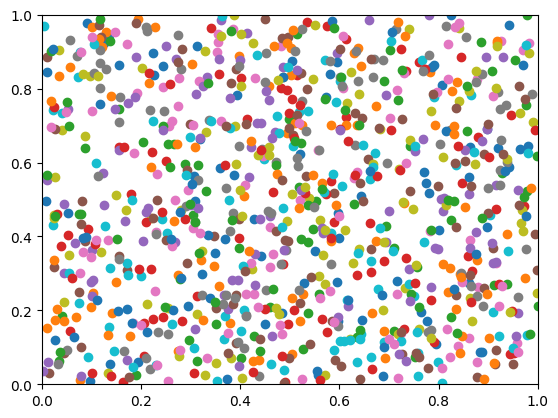

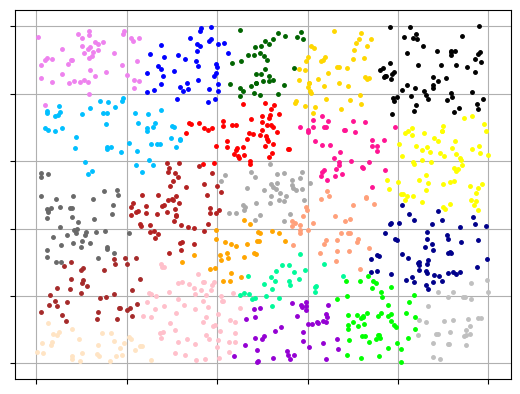

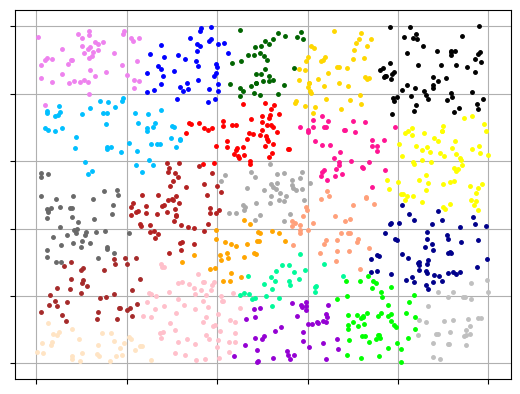

In [10]:
import random
import matplotlib.pyplot as plt
from pyclustering.cluster.gmeans import gmeans

#  存储点的坐标
points = [(random.random(), random.random()) for _ in range(1000)]

#  创建一个新的图形窗口
plt.figure()

# 绘制点
for x, y in points:
    plt.scatter(x, y)

#  设置图形的范围，确保所有点都在视图内
plt.xlim(0,  1)
plt.ylim(0,  1)

#  显示图形
plt.show()

gmeans_instance = gmeans(points).process()
clusters = gmeans_instance.get_clusters()

from pyclustering.cluster import cluster_visualizer


visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, points)
visualizer.show()
